In [48]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [49]:
path= r'E:/fingertips/python/project/project_4/Python_Project_4_Log.csv'

In [50]:
df = pd.read_csv(path)

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [52]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [53]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [54]:
df.shape

(891, 12)

In [55]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [56]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [57]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [58]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

### Age has 20% missing data, it's a numerical column so, mean can be used, Cabin has 77% missing values so it's better to drop Cabin feature, Embarked has 0.22% missing values so those records can be dropped. 

<AxesSubplot:xlabel='Age', ylabel='Count'>

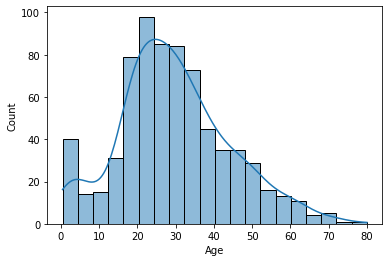

In [59]:
sns.histplot(df["Age"],kde=True)

In [60]:
df_test = pd.DataFrame()

In [61]:
df_test["Age_mean"] = df["Age"].fillna(df["Age"].median())

<AxesSubplot:xlabel='Age_mean', ylabel='Count'>

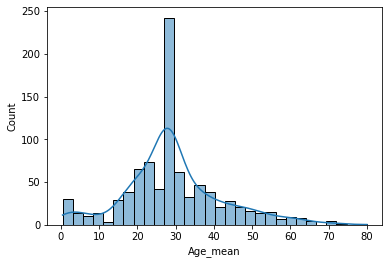

In [62]:
sns.histplot(df_test["Age_mean"],kde=True)

In [63]:
df_test["Age_inter"] = df["Age"].interpolate() 

<AxesSubplot:xlabel='Age_inter', ylabel='Count'>

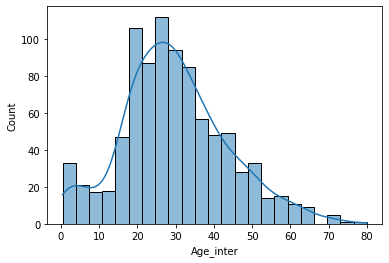

In [64]:
sns.histplot(df_test["Age_inter"],kde=True)

### The interpolation results does't change the distribution of the plot hence it is selected as the imputation technique here.

In [65]:
df["Age"] = df["Age"].interpolate() 

<AxesSubplot:xlabel='Age', ylabel='Count'>

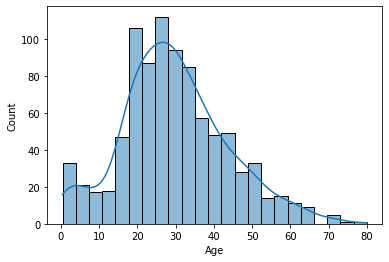

In [66]:
sns.histplot(df["Age"],kde=True)

In [67]:
df=df.drop(["Cabin"],axis=1)

In [68]:
df.shape

(891, 11)

In [69]:
df = df.dropna()

In [70]:
df.shape

(889, 11)

In [71]:
df=df.reset_index().drop("index",axis=1)

In [72]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [73]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [74]:
df.nunique()

PassengerId    889
Survived         2
Pclass           3
Name           889
Sex              2
Age            155
SibSp            7
Parch            7
Ticket         680
Fare           247
Embarked         3
dtype: int64

### PassangerID is just serial number, Name is unique for each record, Ticket has 680 unique categories so its better to drop these features.

In [75]:
df = df.drop(["PassengerId","Name","Ticket"],axis=1)

In [76]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# EDA

## Univariate data analysis

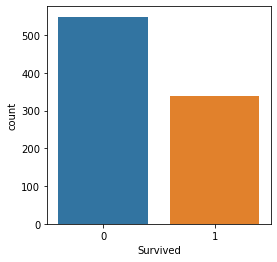

In [77]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Survived")
plt.show()

#### Count of survived passengers < Count of died passengers

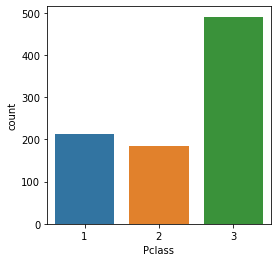

In [78]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Pclass")
plt.show()

#### passengers from Pclass 3  > passengers from Pclass 1 > passengers from Pclass 2

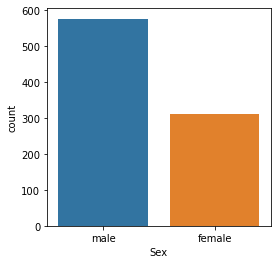

In [79]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Sex")
plt.show()

#### Count of  male passengers > Count of  female passengers 

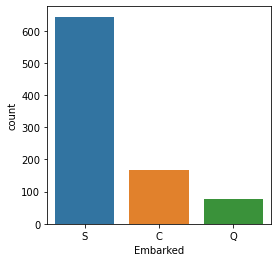

In [80]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Embarked")
plt.show()

#### Count of  passengers from S station > Count of  passengers from C station > Count of  passengers from Q station

## Bivariate data analysis

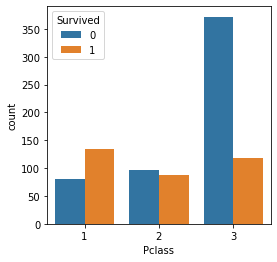

In [81]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Pclass",hue="Survived")
plt.show()

#### More passengers died in Pclass 3
#### Count of passengers survived in Pclass 1  > Count of passengers survived in Pclass 3  > Count of passengers survived in Pclass 2

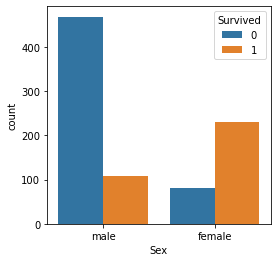

In [82]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Sex",hue="Survived")
plt.show()

#### Although there were more male compared to female the chances of survival for female >  the chances of survival for male  

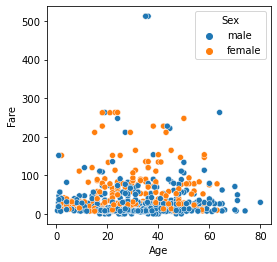

In [83]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="Age",y="Fare",hue="Sex")
plt.show()

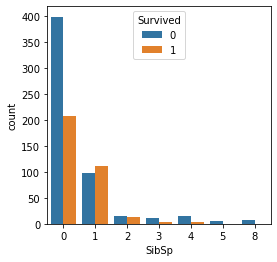

In [84]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="SibSp",hue="Survived")
plt.show()

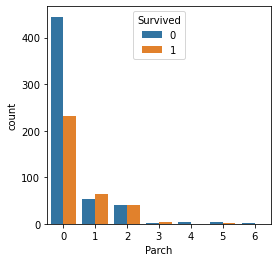

In [85]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Parch",hue="Survived")
plt.show()

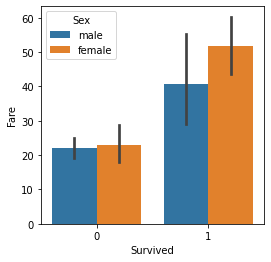

In [86]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x="Survived",y="Fare",hue="Sex")
plt.show()

#### In either gender if one has paid more fare then chances are more that he/she has survived

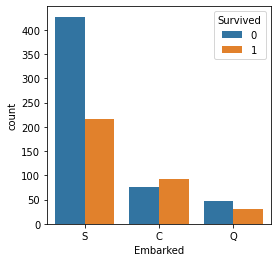

In [87]:
plt.figure(figsize=(4,4))
sns.countplot(data=df,x="Embarked",hue="Survived")
plt.show()

####  More passengers died who were from station S and Q compared to those who survived, but this is opposite case for passengers who were from station C

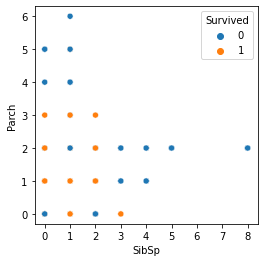

In [88]:
plt.figure(figsize=(4,4))
sns.scatterplot(data=df,x="SibSp",y="Parch",hue="Survived")
plt.xticks([0,1,2,3,4,5,6,7,8],[0,1,2,3,4,5,6,7,8])
plt.show()

#### There are more chances of survival if SibSp <3 and Parch<4  

### Miscellaneous data analysis

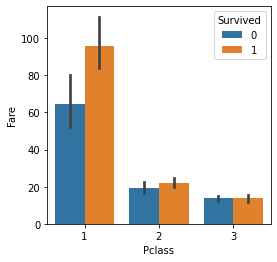

In [89]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x="Pclass",y="Fare",hue="Survived")
plt.show()

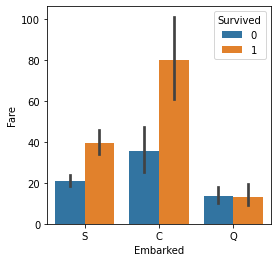

In [90]:
plt.figure(figsize=(4,4))
sns.barplot(data=df,x="Embarked",y="Fare",hue="Survived")
plt.show()

#### As mentioned earlier, if Fare high than chances of survival are high

### Now label encoding for Sex and Embarked columns

In [91]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [92]:
df_cat= pd.DataFrame()

In [93]:
df_cat["Sex"] =  encoder.fit_transform(df['Sex'])

In [94]:
df_cat["Embarked"] = encoder.fit_transform(df['Embarked'])

In [95]:
df_cat=df_cat.reset_index().drop("index",axis=1)

In [96]:
df_cat.head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [97]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [98]:
df_cat[["Pclass","SibSp","Parch"]] = df[["Pclass","SibSp","Parch"]].reset_index().drop("index",axis=1)

In [99]:
df_cat.head()

,Sex,Embarked,Pclass,SibSp,Parch
0,1,2,3,1,0
1,0,0,1,1,0
2,0,2,3,0,0
3,0,2,1,1,0
4,1,2,3,0,0


In [100]:
df_cat.columns

Index(['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch'], dtype='object')

In [101]:
df_cat.shape

(889, 5)

In [102]:
df_final = pd.DataFrame()

In [103]:
df_final[['Survived','Age', 'Fare']] = df[['Survived','Age', 'Fare']].reset_index().drop("index",axis=1)

In [104]:
df_final[['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']] = df_cat[['Sex', 'Embarked', 'Pclass', 'SibSp', 'Parch']].reset_index().drop("index",axis=1)

In [105]:
correlation = df_final.corr()

In [106]:
correlation

,Survived,Age,Fare,Sex,Embarked,Pclass,SibSp,Parch
Survived,1.000000,-0.066659,0.255290,-0.541585,-0.169718,-0.335549,-0.034040,0.083151
Age,-0.066659,1.000000,0.084320,0.066133,-0.024406,-0.301600,-0.212594,-0.169047
Fare,0.255290,0.084320,1.000000,-0.179958,-0.226311,-0.548193,0.160887,0.217532
Sex,-0.541585,0.066133,-0.179958,1.000000,0.110320,0.127741,-0.116348,-0.247508
Embarked,-0.169718,-0.024406,-0.226311,0.110320,1.000000,0.164681,0.068900,0.040449
Pclass,-0.335549,-0.301600,-0.548193,0.127741,0.164681,1.000000,0.081656,0.016824
SibSp,-0.034040,-0.212594,0.160887,-0.116348,0.068900,0.081656,1.000000,0.414542
Parch,0.083151,-0.169047,0.217532,-0.247508,0.040449,0.016824,0.414542,1.000000


<AxesSubplot:>

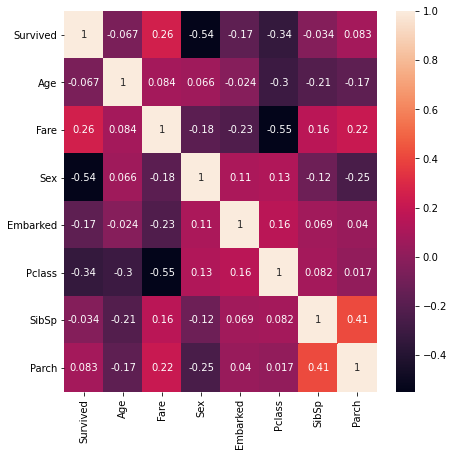

In [107]:
plt.figure(figsize=(7,7))
sns.heatmap(correlation,annot=True)

In [108]:
X = df_final.drop(["Survived"],axis=1)
Y= df_final["Survived"]

### Splitting dataset

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,train_size=0.8,random_state=42)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler =StandardScaler()

In [113]:
xtrain[["Age","Fare"]] = scaler.fit_transform(xtrain[["Age","Fare"]])

In [114]:
xtrain.head()

,Age,Fare,Sex,Embarked,Pclass,SibSp,Parch
707,-0.570934,2.430597,0,2,1,0,0
239,0.121988,-0.358135,0,0,3,1,0
381,0.145882,-0.490949,1,2,3,0,0
791,-0.785979,0.762595,0,2,3,8,2
682,-1.144387,0.301860,1,2,3,5,2


In [115]:
xtest[["Age","Fare"]]  = scaler.transform(xtest[["Age","Fare"]])

In [116]:
xtest.head()

,Age,Fare,Sex,Embarked,Pclass,SibSp,Parch
280,-0.140845,-0.492389,1,2,3,0,0
434,-1.144387,1.788823,0,2,1,1,2
39,-1.144387,-0.423482,0,0,3,1,0
417,0.002518,-0.387716,1,2,2,0,0
584,-0.857661,0.968044,0,2,1,0,2


### Model training time 

In [210]:
from sklearn.ensemble import RandomForestClassifier

In [211]:
forest = RandomForestClassifier( n_estimators=500,
    criterion='gini',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=10,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,)

In [212]:
forest.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_leaf_nodes=10, n_estimators=5000,
                       n_jobs=-1, oob_score=True)

In [213]:
#forest.oob_score_

In [214]:
forest.feature_importances_

array([0.08282835, 0.16891616, 0.46715179, 0.04061437, 0.15869728,
       0.05110227, 0.03068979])

### Feature importance

In [215]:
feature_importance = pd.DataFrame()

In [216]:
feature_importance["Feature_name"] = xtrain.columns
feature_importance["Importance_level"] = forest.feature_importances_
feature_importance= feature_importance.sort_values(by="Importance_level",ascending=False)
feature_importance

,Feature_name,Importance_level
2,Sex,0.467152
1,Fare,0.168916
4,Pclass,0.158697
0,Age,0.082828
5,SibSp,0.051102
3,Embarked,0.040614
6,Parch,0.030690


### Let's evaluate the model

In [217]:
from sklearn.metrics import confusion_matrix,classification_report

### Training performance

In [218]:
predicted_train = forest.predict(xtrain)

In [219]:
confusion_matrix(ytrain,predicted_train)

array([[423,  17],
       [ 97, 174]], dtype=int64)

In [220]:
# Values in Percentage 

confusion_matrix(ytrain,predicted_train,normalize="all")*100

array([[59.49367089,  2.39099859],
       [13.64275668, 24.47257384]])

In [221]:
print(classification_report(ytrain,predicted_train))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       440
           1       0.91      0.64      0.75       271

    accuracy                           0.84       711
   macro avg       0.86      0.80      0.82       711
weighted avg       0.85      0.84      0.83       711



### Testing performance

In [222]:
predicted_test = forest.predict(xtest)

In [223]:
confusion_matrix(ytest,predicted_test)

array([[98, 11],
       [21, 48]], dtype=int64)

In [224]:
# Values in Percentage 

confusion_matrix(ytest,predicted_test,normalize="all")*100

array([[55.05617978,  6.17977528],
       [11.79775281, 26.96629213]])

In [225]:
print(classification_report(ytest,predicted_test))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178

